MALWARE DETECTION USING WINDOWS PORTABLE EXECUTABLE (PE) FEATURES

Extract the fields from the Windows Portable Executable (PE) format and build your own malware detection system. Perform the below tasks to implement the malware detection model.

1.   Use the dataset given in the folder “PE_dataset”. For security reasons, we have already extracted the required fields from malware samples and added the same in "PE_Features.csv" file in the "PE_dataset" folder.
2.   Extract the same set of static features from the benign samples present in "benignware" folder using python utility pefile. Assign the label as ‘0’ for benignware.
3.   Split the dataset into non-overlapping training and test sets, in which the training set consists of 70% of the data (an arbitrarily chosen proportion) and the test set consists of the remaining 30%.
4.   Train the 2 machine learning classifiers to recognize malware using the features you have extracted. Use the inbuilt functions from sklearn for implementing the models and calculating metrics.
5.   Test your model and calculate the prediction accuracy, precision, recall, false-positive rate, F1-score and confusion matrix.

In [1]:
!pip install pefile

In [2]:
# Importing the necessary libraries
import os
import pefile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [3]:
# Function for extracting the PE features
def features_extract(path):

  # List for appending the PE Features
  feature_list = []

  # Using pefile library to parse the executable
  pe = pefile.PE(path)

  # FILE HEADER
  feature_list.append(pe.FILE_HEADER.Machine)
  feature_list.append(pe.FILE_HEADER.NumberOfSections)
  feature_list.append(pe.FILE_HEADER.TimeDateStamp)
  feature_list.append(pe.FILE_HEADER.PointerToSymbolTable)
  feature_list.append(pe.FILE_HEADER.NumberOfSymbols)
  feature_list.append(pe.FILE_HEADER.Characteristics)

  # OPTIONAL HEADER
  feature_list.append(pe.OPTIONAL_HEADER.SizeOfCode)
  feature_list.append(pe.OPTIONAL_HEADER.SizeOfInitializedData)
  feature_list.append(pe.OPTIONAL_HEADER.SizeOfUninitializedData)
  feature_list.append(pe.OPTIONAL_HEADER.AddressOfEntryPoint)
  feature_list.append(pe.OPTIONAL_HEADER.BaseOfCode)
  feature_list.append(pe.OPTIONAL_HEADER.BaseOfData)
  feature_list.append(pe.OPTIONAL_HEADER.SectionAlignment)
  feature_list.append(pe.OPTIONAL_HEADER.FileAlignment)
  feature_list.append(pe.OPTIONAL_HEADER.MajorImageVersion)
  feature_list.append(pe.OPTIONAL_HEADER.MinorImageVersion)
  feature_list.append(pe.OPTIONAL_HEADER.SizeOfImage)
  feature_list.append(pe.OPTIONAL_HEADER.SizeOfHeaders)
  feature_list.append(pe.OPTIONAL_HEADER.CheckSum)
  feature_list.append(pe.OPTIONAL_HEADER.DllCharacteristics)
  feature_list.append(pe.OPTIONAL_HEADER.SizeOfStackReserve)
  feature_list.append(pe.OPTIONAL_HEADER.SizeOfStackCommit)
  feature_list.append(pe.OPTIONAL_HEADER.SizeOfHeapReserve)
  feature_list.append(pe.OPTIONAL_HEADER.SizeOfHeapCommit)
  feature_list.append(pe.OPTIONAL_HEADER.NumberOfRvaAndSizes)

  
  # Calculating the number of packed sections
  sec = []
  for section in pe.sections:
    sec.append(section.Name.decode().rstrip('\x00'))
  
  # print("SEC COUNT: ", sec.count('UPX0'))
  feature_list.append(sec.count('UPX0'))
  # Calculating the number of imported DLLs and functions
  # print("DLL COUNT: ", len(pe.DIRECTORY_ENTRY_IMPORT))
  feature_list.append(len(pe.DIRECTORY_ENTRY_IMPORT))

  return feature_list

In [4]:
if __name__ == '__main__':

    output = "PE_Features.csv"

    # Open the file "PE_Features.csv" in append mode
    fd = open(output, 'a')

    # Hardcoded list of section names commonly found in packed executables

    packsec = ['.aspack', 'ASPack', '.ASPack', 'FSG!', '.MPRESS1', '.MPRESS2', 'UPX0', 'UPX1', 'UPX2', 'UPX!', '.UPX0', '.UPX1', '.UPX2']
    c = 0
    
    # Read the benign executables in "benignware" folder, extract the features, add the FileCategory as 0 and append these features to the csv file
    for file in os.listdir("benignware"):
        c += 1
        if file.endswith(".exe"):
            try:
                feature = features_extract("benignware/"+file)
            except:
                print("Error: ", file, f"@{c}")
            feature.append(108.6090)
            feature.append(0)
            fd.write(",".join(map(str, feature)))
            fd.write("\n")
            # print("Done: ", file, f"@{c}")
    fd.close()

Error:  wowdeb.exe @32
Error:  debug.exe @33
Error:  mscdexnt.exe @71
Error:  twunk_16.exe @77
Error:  winspool.exe @100
Error:  gdi.exe @102
Error:  redir.exe @142
Error:  wowexec.exe @155
Error:  edlin.exe @157
Error:  exe2bin.exe @171
Error:  winhelp.exe @188
Error:  krnl386.exe @217
Error:  nw16.exe @222
Error:  fastopen.exe @227
Error:  sysedit.exe @231
Error:  setver.exe @297
Error:  dosx.exe @299
Error:  mem.exe @314
Error:  nlsfunc.exe @352
Error:  vwipxspx.exe @360
Error:  user.exe @381
Error:  share.exe @397
Error:  drwatson.exe @401


In [5]:
print(c)

440


APPLYING MACHINE LEARNING ON THE EXTRACTED FEATURES TO GENERATE AN ACCURATE MODEL WHICH PREDICTS WHETHER AN EXECUTABLE IS MALICIOUS OR NOT

In [7]:
# Read the CSV file containing PE header values as columns.
malware_dataset = pd.read_csv("PE_Features.csv", delimiter=',')

In [8]:
# Create X by removing "FileCategory" column
X = malware_dataset.iloc[:, :-1].values

# Create y which contains "FileCategory" column
y = malware_dataset.iloc[:, -1].values

In [9]:
from sklearn.model_selection import train_test_split
# Split the model into 30% testing and 70% training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, train_size=0.70, random_state=0)

Accuracy: 94.83568075117371
              precision    recall  f1-score   support

  benignware       0.94      0.95      0.94        95
     malware       0.96      0.95      0.95       118

    accuracy                           0.95       213
   macro avg       0.95      0.95      0.95       213
weighted avg       0.95      0.95      0.95       213

Confusion Matrix of KNeighborsClassifier



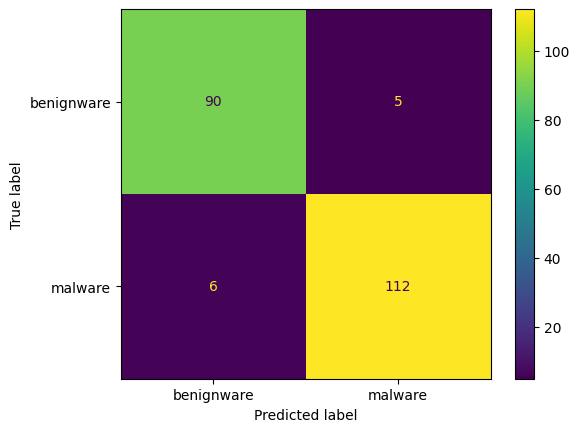

In [10]:
# Build a machine learning model using K Nearest Neighbours Classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Make predictions on the test dataset
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: " + str(accuracy*100))

target_names = ['benignware', 'malware']
print(classification_report(y_test,y_pred,target_names = target_names))

# Creating the confusion matrix
print("Confusion Matrix of KNeighborsClassifier\n")
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
conf_mat = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
conf_mat.plot()
plt.show()

In [ ]:
# Build a machine learning model using Random Forest Classifier
rfc = RandomForestClassifier()
'''
'''